# Algerian Forest Fire Dataset - Temperature Prediction



* Data Collection
* Exploratory data analysis
* Data Cleaning
* Linear Regression Model Training
* Ridge Regression Model Training
* Lasso Regression Model Training
* Elastincet Regression Model Training



# Importing the Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")

In [3]:
data.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
71,11,8,2012,35,63,13,0,88.9,21.7,77,7.1,25.5,12.1,fire
99,8,9,2012,30,73,17,0.9,62,2.6,8.4,1.1,3,0.4,not fire
213,28,8,2012,35,56,14,0.4,79.2,37,166,2.1,30.6,6.1,not fire
69,9,8,2012,35,59,17,0,87.4,14.8,57,6.9,17.9,9.9,fire
180,26,7,2012,35,58,10,0.2,78.3,10.8,19.7,1.6,10.7,1,not fire


# Making profile of the data

## How big is the data ?

In [4]:
data.shape

(247, 14)

###  Observations

# How does the data look like ?

In [5]:
data.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
35,6,7,2012,32,63,14,0,87,10.9,37,5.6,12.5,6.8,fire
137,13,6,2012,30,52,15,2,72.3,11.4,7.8,1.4,10.9,0.9,not fire
233,17,9,2012,34,44,12,0,92.5,25.2,63.3,11.2,26.2,17.5,fire
140,16,6,2012,29,87,15,0.4,47.4,4.2,8,0.2,4.1,0.1,not fire
112,21,9,2012,31,55,11,0,87.8,16.5,57.9,5.4,19.2,8.3,fire


# what is the data type of the column ?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


###  Observations

#   any missing Value?

In [7]:
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

### Observation

# how does the data look

In [8]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


# Are there duplicates values

In [9]:
data.duplicated().sum()

0

# Find unique value in all columns

In [10]:
data.nunique()

day             33
month            5
year             2
Temperature     20
 RH             63
 Ws             19
Rain            40
FFMC           174
DMC            167
DC             199
ISI            107
BUI            175
FWI            127
Classes          9
dtype: int64

### Observations

In [11]:
data.iloc[124]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 124, dtype: object

### Observations

# Data Cleaning For EDA

In [12]:
# drop the 124 row from the data

data=data.drop(124)

In [13]:
# drop nan rows also
data.dropna(inplace=True)

# Converting The DataTypes of the Columns

In [14]:
for i in list(data.columns[0:6]):
    data[i]=data[i].astype(int)

In [15]:
for i in list(data.columns[6:-1]):
    data[i]=data[i].astype(float)


# Adding New Column

In [16]:
data.loc[:122, 'region'] = 'bejaia'
data.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [17]:
# check the data info

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4    RH          243 non-null    int32  
 5    Ws          243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    object 
dtypes: float64(7), int32(6), object(2)
memory usage: 32.8+ KB


In [18]:
# describe the data again

In [19]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


# Extracting numerical feature

In [20]:
num_feature=[i for i in data.columns if data[i].dtype!="O"]

In [21]:
num_feature

['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

# Extracting categorical feature

In [22]:
cat_feature=[i for i in data.columns if data[i].dtype=="O"]

In [23]:
cat_feature

['Classes  ', 'region']

# Univariate Analysis

### Univariate Analysis on Categorical Feature

### Countplot

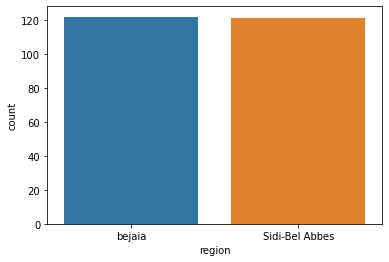

In [24]:
sns.countplot(data['region'])

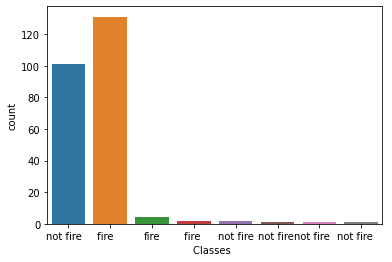

In [25]:
sns.countplot(data['Classes  '])

## Observation 

#### This featue is useless so we can drop this feature

In [26]:
# drop classes feature from dataset
data.drop('Classes  ',axis=1,inplace=True)

# Pie Chart

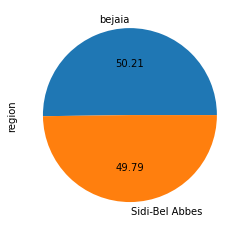

In [27]:
data['region'].value_counts().plot(kind='pie',autopct='%.2f')

### Univariate Analysis on Numerical Feature

# Histogram

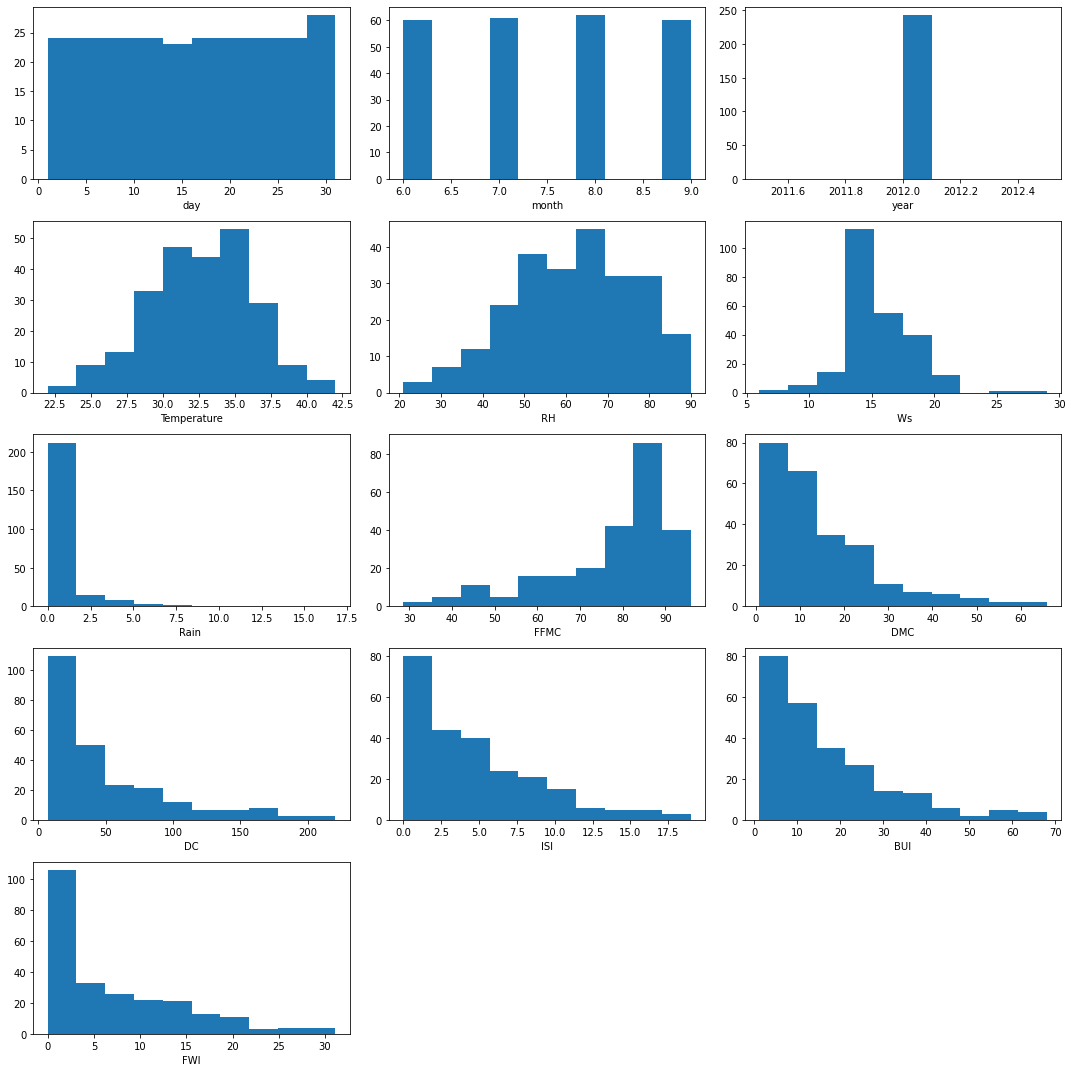

In [28]:
plt.figure(figsize=(15, 15))
#plt.suptitle(fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_feature)):
    plt.subplot(5, 3, i+1)
    plt.hist(x=data[num_feature[i]])
    plt.xlabel(num_feature[i])
    plt.tight_layout()

# Distplot

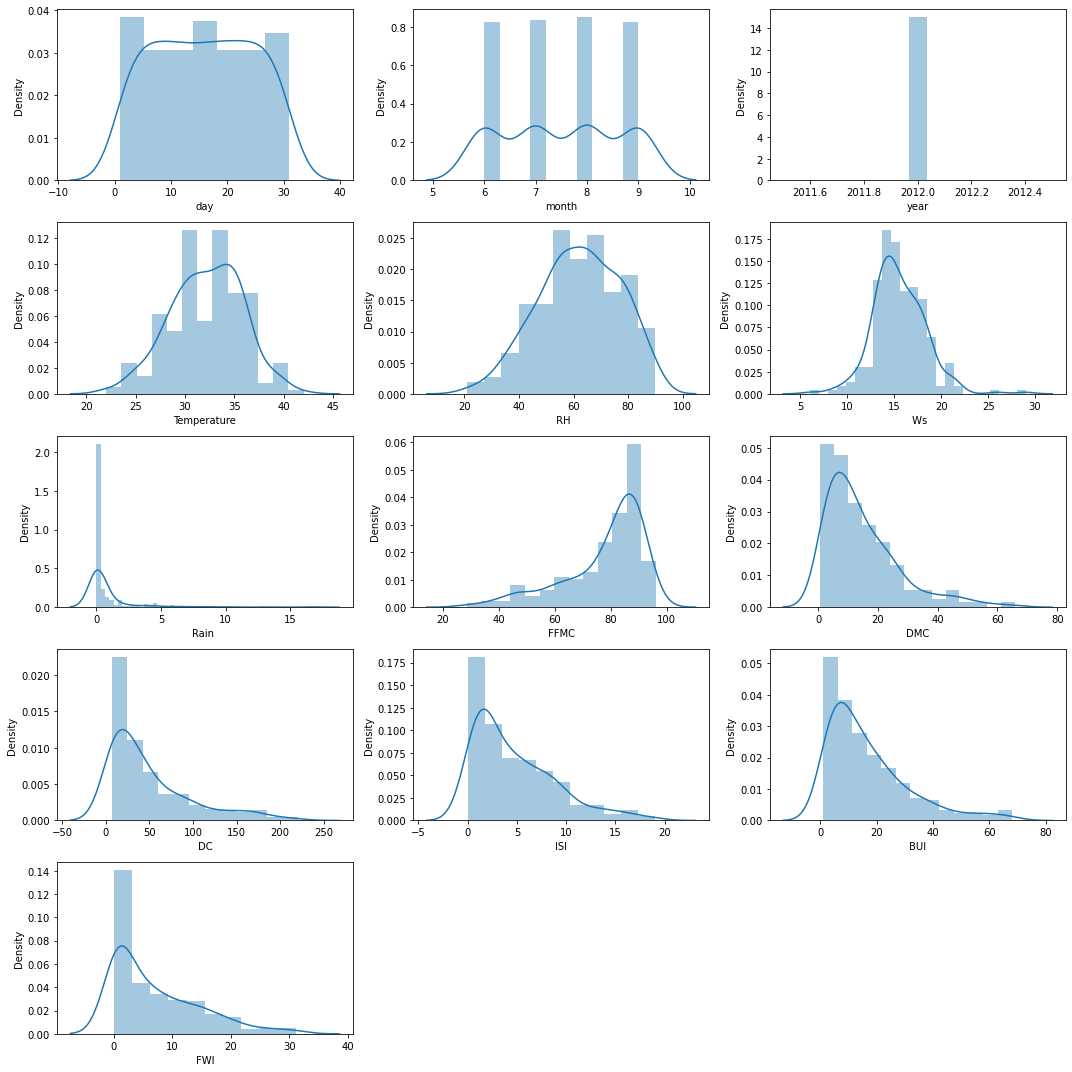

In [29]:
plt.figure(figsize=(15, 15))
#plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_feature)):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=data[num_feature[i]])
    plt.xlabel(num_feature[i])
    plt.tight_layout()

# Boxplot

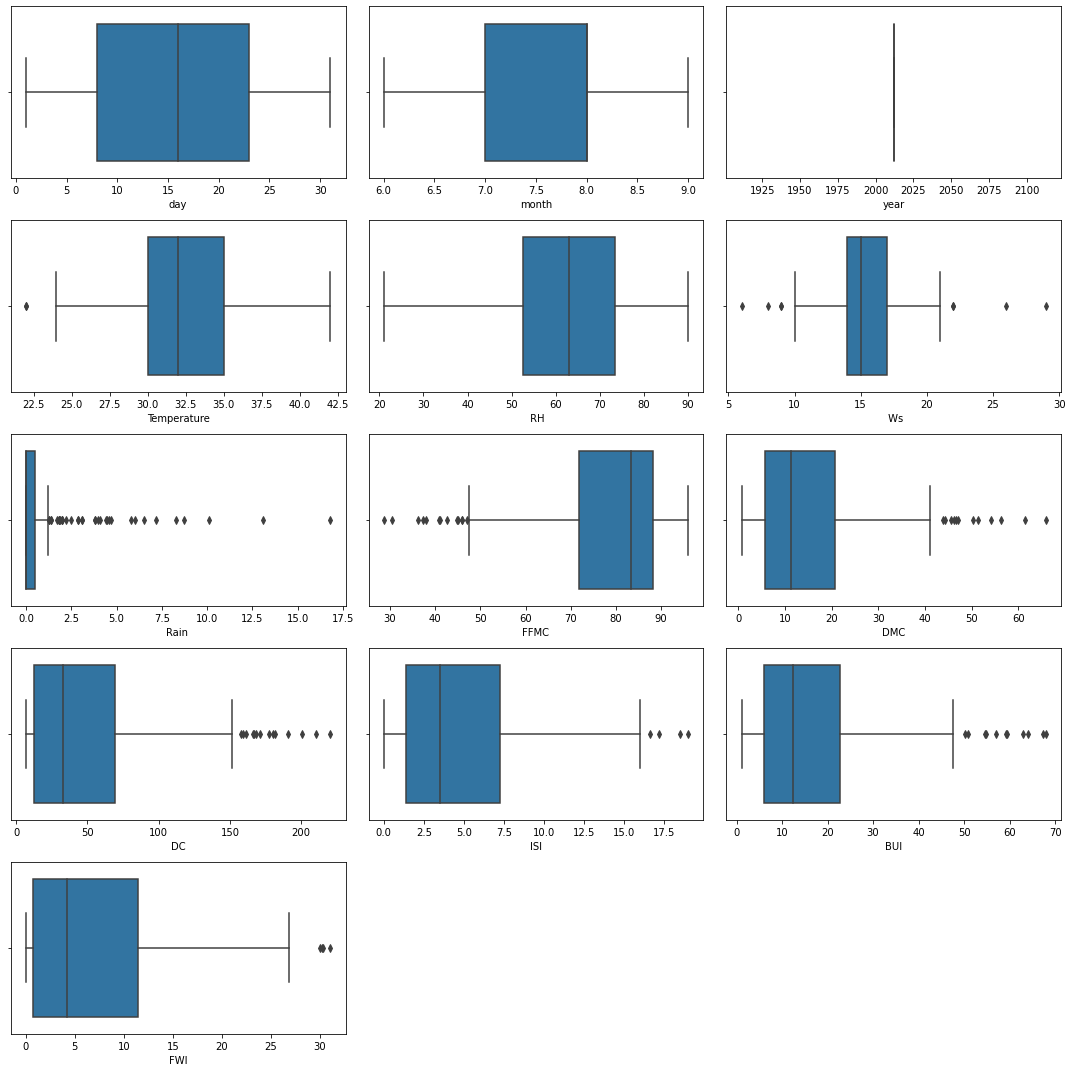

In [30]:
plt.figure(figsize=(15, 15))
#plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_feature)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data[num_feature[i]])
    plt.xlabel(num_feature[i])
    plt.tight_layout()

# Bivariate analysis and multivariate analysis

## Scatterplot (Numerical-Numerical)

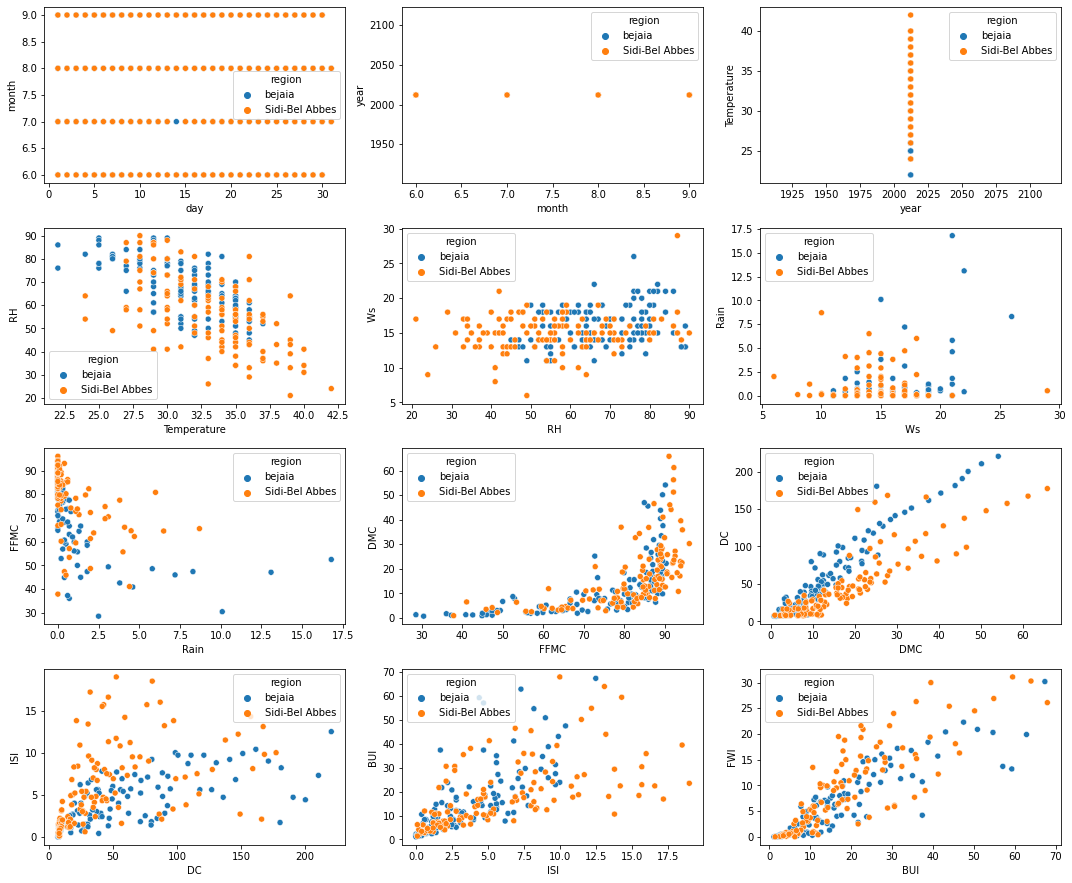

In [31]:
plt.figure(figsize=(15, 15))
#plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_feature)-1):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(data[num_feature[i]],data[num_feature[i+1]],hue=data['region'])
    plt.xlabel(num_feature[i])
    plt.tight_layout()

# strip plot to see the relationship between numerical features and target

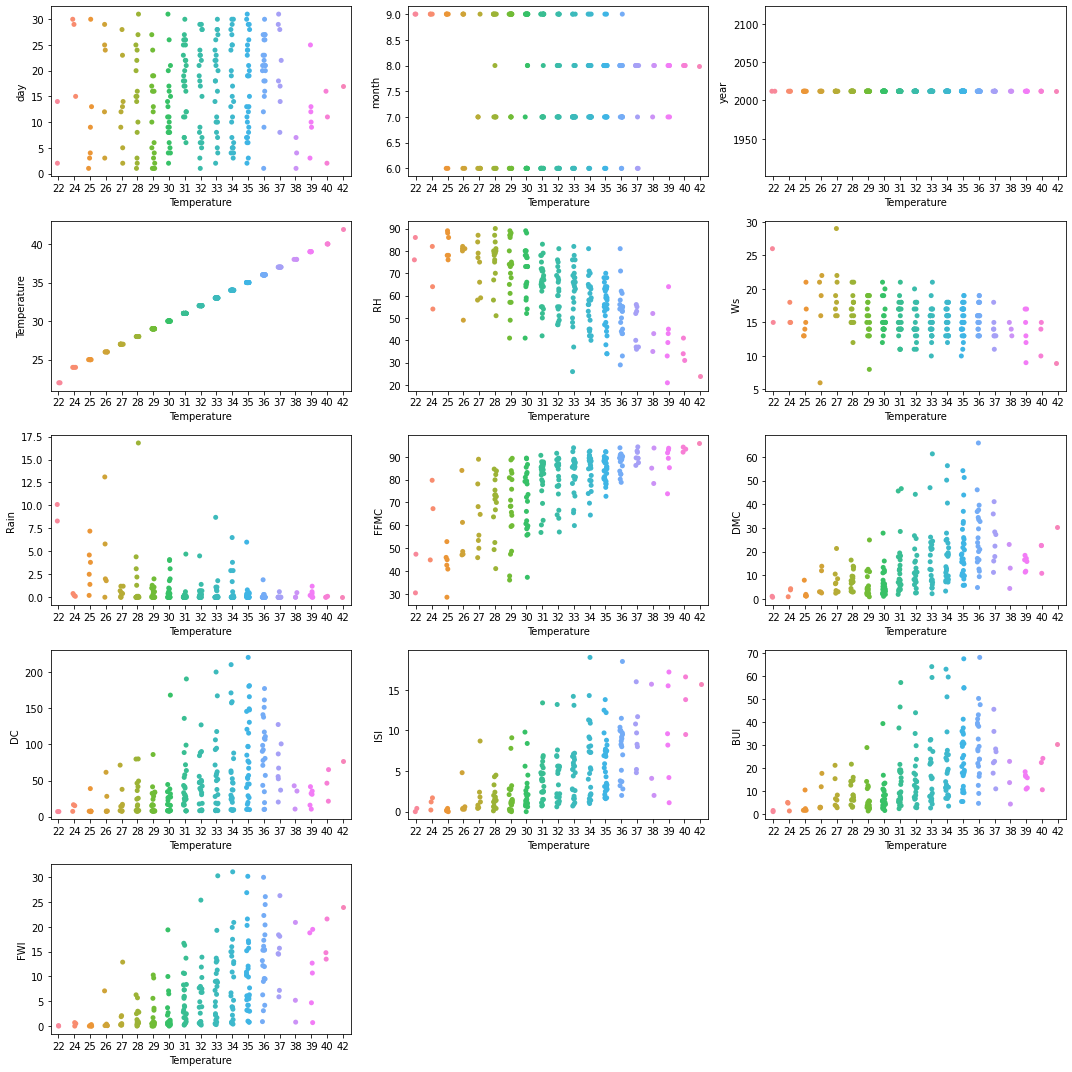

In [32]:
plt.figure(figsize=(15, 15))
#plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_feature)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=num_feature[i], x='Temperature', data=data)
    plt.tight_layout()

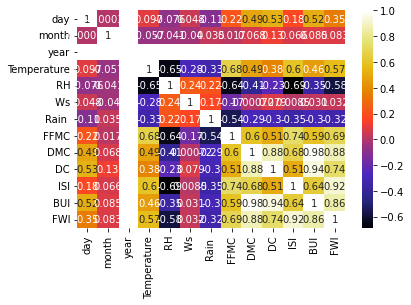

In [33]:
sns.heatmap(data[num_feature].corr(), cmap="CMRmap", annot=True)
plt.show()

### Boxplot of 'FFMC' Vs Temperature 

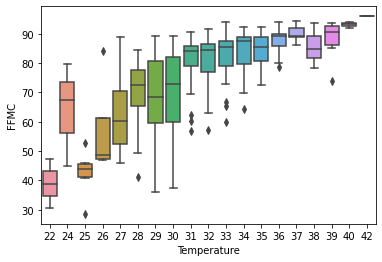

In [34]:
sns.boxplot(x ='Temperature', y ='FFMC', data = data)

### Boxplot of ISI Vs Temperature 

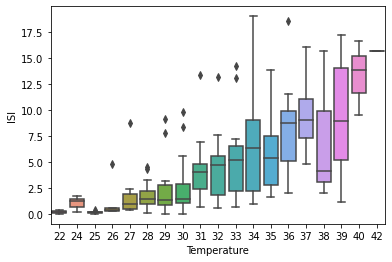

In [35]:
sns.boxplot(x ='Temperature', y ='ISI', data = data)

### Boxplot of region Vs Temperature 

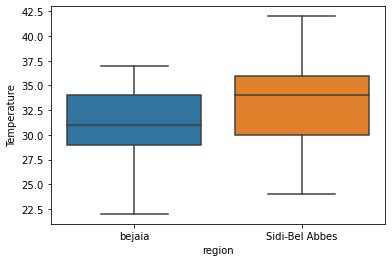

In [36]:
sns.boxplot(x ='region', y ='Temperature', data = data)

### Boxplot of BUI Vs Temperature 

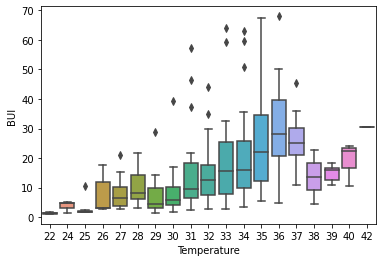

In [37]:
sns.boxplot(x ='Temperature', y ='BUI', data = data)

### Boxplot DMC Vs Temperature 

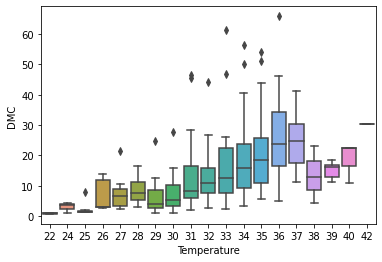

In [38]:
sns.boxplot(x ='Temperature', y ='DMC', data = data)

### Creating Dependent and Independent features 

In [39]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region'],
      dtype='object')

In [40]:
## Independent Features

x=pd.DataFrame(data,columns=['day', 'month', 'year',  ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'])  

## Dependent Features

y=pd.DataFrame(data,columns=['Temperature'])

### Independent Features 

In [41]:
x

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
243,27,9,2012,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
244,28,9,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
245,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


### Dependent Features 

In [42]:
y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
242,30
243,28
244,27
245,24


# TrainTest Split

In [43]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.33,random_state=10)

In [44]:
x_train.shape

(162, 12)

In [45]:
x_test.shape

(81, 12)

In [46]:
y_train.shape

(162, 1)

In [47]:
y_test.shape

(81, 1)

#### Independent training dataset 

In [48]:
x_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
25,26,6,2012,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6
121,30,9,2012,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1
177,23,7,2012,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3
72,12,8,2012,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2
189,4,8,2012,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,2012,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9
15,16,6,2012,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0
232,16,9,2012,26,13,0.0,93.9,21.2,59.2,14.2,22.4,19.3
128,4,6,2012,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0


#### Independent Test Dataset 

In [49]:
x_test

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
46,17,7,2012,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6
229,13,9,2012,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3
184,30,7,2012,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2
116,25,9,2012,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1
127,3,6,2012,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
130,6,6,2012,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1
245,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7
211,26,8,2012,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3
102,11,9,2012,77,21,1.8,58.5,1.9,8.4,1.1,2.4,0.3


#### Dependent Training Dataset 

In [50]:
y_train

,Temperature
25,31
121,25
177,31
72,35
189,38
...,...
64,34
15,29
232,33
128,30


#### Dependent Test Dataset 

In [51]:
y_test

,Temperature
46,29
229,29
184,36
116,26
127,29
...,...
130,35
245,24
211,33
102,30


### Standardizing or Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  ## Initialising

In [53]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
x_train=scaler.fit_transform(x_train)

In [55]:
x_test=scaler.transform(x_test)

In [56]:
x_train

array([[ 1.30705791, -1.39305207,  0.        , ...,  0.48086219,
         0.38986031,  0.52024214],
       [ 1.77217242,  1.29354835,  0.        , ..., -1.07139989,
        -1.0010797 , -0.93452011],
       [ 0.95822202, -0.4975186 ,  0.        , ...,  0.5286241 ,
         2.19373563,  1.30997022],
       ...,
       [ 0.14427163,  1.29354835,  0.        , ...,  2.27193383,
         0.44781614,  1.72561657],
       [-1.2510719 , -1.39305207,  0.        , ..., -0.59378078,
        -0.76925637, -0.8098262 ],
       [-0.55340014, -1.39305207,  0.        , ..., -0.80870938,
        -0.26214282, -0.82368108]])

In [57]:
x_test

array([[ 2.60550258e-01, -4.97518595e-01,  0.00000000e+00,
         4.66231295e-01, -5.81850675e-01, -4.24064583e-01,
         3.74594357e-01, -4.06694465e-01, -3.03195163e-01,
        -3.54971234e-01, -3.70810009e-01, -4.49599362e-01],
       [-2.04564252e-01,  1.29354835e+00,  0.00000000e+00,
        -9.26322582e-01,  1.26638088e+00, -4.24064583e-01,
         7.58044470e-01, -2.28559462e-01, -3.17928133e-01,
         1.05400512e+00, -2.76631780e-01,  4.78677502e-01],
       [ 1.77217242e+00, -4.97518595e-01,  0.00000000e+00,
        -4.62137956e-01,  1.57441947e-01, -4.24064583e-01,
         7.77878096e-01,  8.14802699e-01,  1.80888129e-01,
         8.39076521e-01,  5.49238849e-01,  8.80468981e-01],
       [ 1.19077928e+00,  1.29354835e+00,  0.00000000e+00,
         1.19566428e+00,  2.00567350e+00,  3.00789995e+00,
        -1.88643906e+00, -9.49582093e-01, -8.58838594e-01,
        -1.02363798e+00, -9.57612824e-01, -9.34520112e-01],
       [-1.36735053e+00, -1.39305207e+00,  0.0000000

### Model Training 

In [58]:
from sklearn.linear_model import LinearRegression


In [59]:
regression=LinearRegression()

In [60]:
regression
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Coefficient 

In [61]:
print(regression.coef_)

[[-3.59760606e-01 -2.07949400e-01 -6.66133815e-16 -1.48610283e+00
  -7.25137971e-01 -2.14475736e-01  9.84438556e-01  4.89903857e-01
   5.59074966e-01  1.56408778e-01 -1.35154282e-01 -3.27646215e-01]]


#### Intercept 

In [62]:
print(regression.intercept_)

[32.07407407]


### Precdiction for Test Data 

In [63]:
reg_pred=regression.predict(x_test)
reg_pred

array([[32.04572357],
       [32.92987407],
       [33.23814672],
       [24.9733634 ],
       [28.88173569],
       [33.59971493],
       [31.94965038],
       [34.62252392],
       [31.53652463],
       [32.76500165],
       [33.55662832],
       [33.4961886 ],
       [35.59682697],
       [31.98514881],
       [33.50594348],
       [33.43355473],
       [26.66644882],
       [36.03746021],
       [33.34590857],
       [24.06010277],
       [32.16101853],
       [32.53678767],
       [33.072265  ],
       [32.83621735],
       [30.11845952],
       [32.55512949],
       [33.38292998],
       [32.0688871 ],
       [32.38195624],
       [34.0147771 ],
       [34.78299348],
       [33.57026301],
       [34.25792739],
       [32.82828543],
       [31.17308483],
       [28.823611  ],
       [32.59288165],
       [31.57473613],
       [33.09732933],
       [34.40016709],
       [33.79545074],
       [35.45382708],
       [34.48495762],
       [37.08570769],
       [33.05292106],
       [36

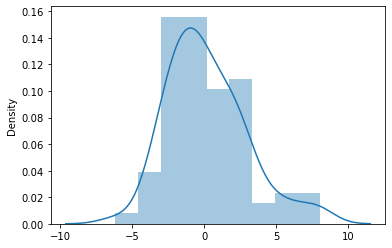

In [64]:
import seaborn as sns
sns.distplot(reg_pred-y_test)

# Assumption of Linear Regression

Text(0, 0.5, 'Test predicted data')

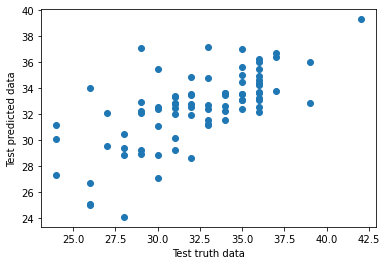

In [65]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

### Residuals 

In [66]:
residual=y_test-reg_pred

In [67]:
residual

,Temperature
46,-3.045724
229,-3.929874
184,2.761853
116,1.026637
127,0.118264
...,...
130,-0.022117
245,-7.161432
211,-4.173486
102,2.909368


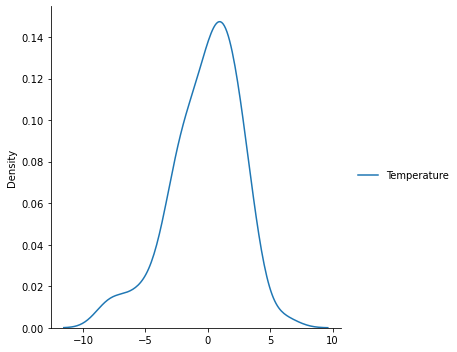

In [68]:
sns.displot(residual,kind='kde')

### Scatterplot with prediction and residual 

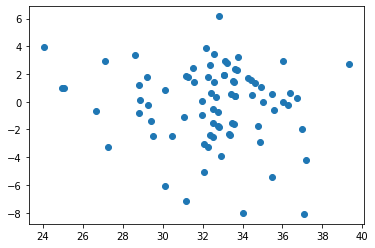

In [69]:
plt.scatter(reg_pred,residual)

### Performance Metrics 

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.6232120576984705
2.139576518309345
2.761016489935993


### R square and adjusted R square 

In [71]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.4493097164784675


### Adjusted R square 

In [72]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.35212907820996175

# Ridege Regression Algorithm 

In [73]:
from sklearn.linear_model import Ridge


In [74]:
ridge=Ridge()

In [75]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
## Coefficient

print(ridge.coef_)

[[-0.35414025 -0.20483015  0.         -1.47419702 -0.72535001 -0.21731847
   0.97923153  0.35326365  0.4745688   0.13544884  0.05478063 -0.28129306]]


In [78]:
## Intercept

print(ridge.intercept_)

[32.07407407]


In [79]:
ridge_pred=ridge.predict(x_test)

In [80]:
ridge_pred

array([[32.04792803],
       [32.92437205],
       [33.23909882],
       [24.99775465],
       [28.89393287],
       [33.59873917],
       [31.93691186],
       [34.62488992],
       [31.54652792],
       [32.76462823],
       [33.5519589 ],
       [33.48948957],
       [35.57275979],
       [31.99933098],
       [33.45507821],
       [33.44550297],
       [26.70185766],
       [36.02626213],
       [33.33851779],
       [24.0703515 ],
       [32.12683414],
       [32.53017701],
       [33.0917077 ],
       [32.84211183],
       [30.10996981],
       [32.56102021],
       [33.37942771],
       [32.05501754],
       [32.37212909],
       [34.00039369],
       [34.76641485],
       [33.55938479],
       [34.2414206 ],
       [32.83569023],
       [31.18045264],
       [28.83036278],
       [32.57521966],
       [31.5740312 ],
       [33.10265835],
       [34.37277781],
       [33.79585294],
       [35.44143906],
       [34.48524832],
       [37.06014009],
       [33.05437395],
       [36

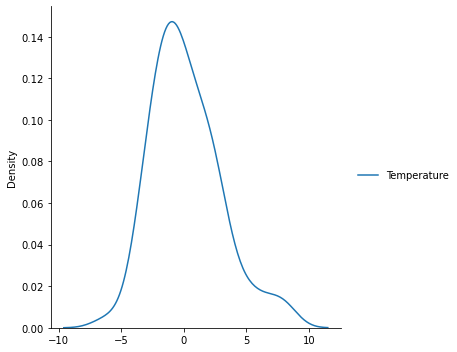

In [81]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

# Assumption on Ridge Regression 

Text(0, 0.5, 'Test predicted data')

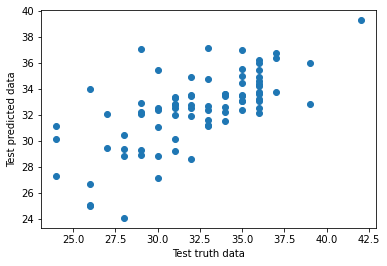

In [82]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

In [83]:
# Residual

residual=y_test-ridge_pred

In [84]:
residual

,Temperature
46,-3.047928
229,-3.924372
184,2.760901
116,1.002245
127,0.106067
...,...
130,0.000550
245,-7.164072
211,-4.166442
102,2.892934


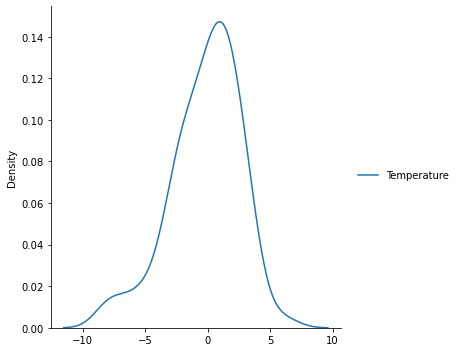

In [85]:
sns.displot(residual,kind='kde')

### Scatter plot with residual and prediction 

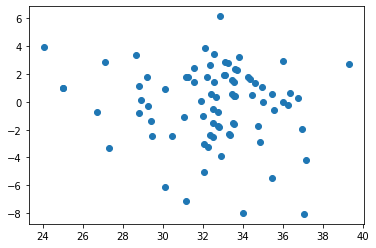

In [86]:
plt.scatter(ridge_pred,residual)

## Performance Matrics 

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

7.616302656274304
2.1397222803107128
2.759764963955138


### R square 

In [88]:
from sklearn.metrics import r2_score
ridge_score=r2_score(y_test,ridge_pred)
print(ridge_score)

0.4498088420702048


## Adjusted R square 

In [89]:
1-(1-ridge_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.35271628478847616

# Lasso Regression 

In [90]:
from sklearn.linear_model import Lasso

In [91]:
lasso=Lasso()

In [92]:
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Coefficients and Intercepts

In [94]:
print(lasso.coef_)

[ 0.         -0.          0.         -0.88423537 -0.         -0.
  0.88313134  0.          0.          0.          0.          0.        ]


In [95]:
print(lasso.intercept_)

[32.07407407]


In [96]:
## Prediction for test data

lasso_pred = lasso.predict(x_test)

In [97]:
lasso_pred

array([31.99263189, 33.56261409, 33.16968133, 29.35085197, 29.41532603,
       33.00570181, 32.24618859, 33.57987995, 32.17946599, 33.03180429,
       32.43352237, 32.64830012, 34.42463082, 31.61671515, 32.83763259,
       33.35142638, 29.33942467, 34.79854886, 32.38506498, 29.63719153,
       32.36854863, 32.21265622, 32.60134175, 31.81897394, 31.16330572,
       32.75364414, 32.88409128, 32.36320974, 32.04108928, 31.96868565,
       33.24608236, 33.07067555, 33.54659742, 32.57214892, 31.41161583,
       30.06340682, 32.79726231, 32.13550568, 33.36310351, 33.22497663,
       33.25167109, 34.07840658, 33.22831682, 33.75728546, 32.90619636,
       34.59903828, 32.34644356, 33.72050521, 31.73648451, 31.41845375,
       32.26170559, 35.46055533, 32.15686124, 33.60932262, 29.07618954,
       34.41195434, 33.23999395, 32.50358516, 29.88575148, 32.20406944,
       32.0385909 , 31.44605525, 29.20463799, 34.49394409, 33.4095622 ,
       30.24824223, 31.37474327, 30.84852284, 34.06622977, 30.49

### Performace Matrics 

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

8.69462464944341
2.370968686727018
2.9486648927003234


## R Square 

In [99]:
from sklearn.metrics import r2_score
lasso_score=r2_score(y_test,lasso_pred)
print(lasso_score)

0.3719123543887275


## Adjusted R square 

In [100]:
1-(1-lasso_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.26107335810438526

#  Elastic - Net regression

In [101]:
from sklearn.linear_model import ElasticNet

In [102]:
elastic=ElasticNet()

In [103]:
elastic

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
elastic.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### Coefficients and Intercepts 

In [105]:
print(elastic.coef_)

[-0.         -0.          0.         -0.77155493 -0.27327033 -0.02945645
  0.70980198  0.11177449  0.          0.20914599  0.04593431  0.12829249]


In [106]:
print(elastic.intercept_)

[32.07407407]


In [107]:
## Prediction for test data
elastic_pred = elastic.predict(x_test)

In [108]:
elastic_pred

array([31.9573208 , 33.23686908, 33.35699564, 28.69175409, 29.50702659,
       33.21952486, 31.75246849, 33.96237735, 32.10800305, 32.71913539,
       32.6464949 , 32.70818669, 34.28160866, 31.98757886, 32.58127398,
       33.38088877, 29.25544946, 35.1329971 , 32.41345187, 28.81942678,
       31.92062398, 32.01321369, 32.87611371, 32.19248582, 30.76147509,
       32.77885483, 32.9241576 , 31.80574265, 31.84088675, 32.63570681,
       33.35824365, 32.97725238, 33.16526411, 32.6259555 , 31.48228091,
       29.90876877, 32.28704956, 31.73349961, 33.28556103, 32.87586141,
       33.61368581, 34.06687234, 33.48616338, 34.31378768, 32.80354959,
       35.56194932, 31.98083723, 34.20080511, 31.06352775, 31.3703163 ,
       32.33015611, 36.68465163, 32.02910227, 33.90164802, 29.13016242,
       35.33664404, 33.44975962, 32.59500157, 29.89482886, 32.07728159,
       32.39209933, 31.39172713, 28.33121558, 35.11153428, 34.62534381,
       30.33956758, 30.58992082, 30.41863187, 34.79501455, 29.86

# Assumption of Elastic Net Regression

Text(0, 0.5, 'Test predicted data')

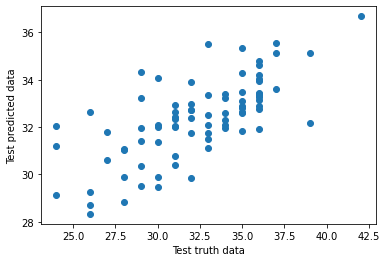

In [109]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

## Performance Matrix

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_pred))
print(mean_absolute_error(y_test,elastic_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))

7.918267418307838
2.279648251186519
2.813941616009088


### R square

In [111]:
from sklearn.metrics import r2_score
elastic_score=r2_score(y_test,elastic_pred)
print(elastic_score)

0.4279953257782334


### Adjusted R square 

In [112]:
1-(1-elastic_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3270533244449805